In [48]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.linear_model import LinearRegression

In [49]:
masterData = pd.read_csv("speedTest3.txt")
masterData["timeRaw"] = masterData["timeRaw"].apply(lambda p: p.split("=")[1]).apply(int)
masterData["dutyCycleRaw"] = masterData["dutyCycleRaw"].apply(lambda p: p.split("=")[1]).apply(int)
masterData["encoderRaw"] = masterData["encoderRaw"].apply(lambda p: p.split("=")[1]).apply(int)
masterData

,timeRaw,dutyCycleRaw,encoderRaw
0,4077,0,0
1,4078,1,0
2,4078,1,0
3,4079,1,0
4,4081,1,0
...,...,...,...
206139,514928,0,-629340
206140,514930,0,-629340
206141,514933,0,-629340
206142,514935,0,-629340


In [50]:
masterData["Time"] = masterData["timeRaw"] / 1000 / 60 # ms => min
masterData["Duty Cycle"] = masterData["dutyCycleRaw"] / 255 * 100 # 0-255 => 0-100%
masterData["Encoder"] = - masterData["encoderRaw"] / 12 / 298 # counts => revs

masterData

,timeRaw,dutyCycleRaw,encoderRaw,Time,Duty Cycle,Encoder
0,4077,0,0,0.067950,0.000000,0.000000
1,4078,1,0,0.067967,0.392157,0.000000
2,4078,1,0,0.067967,0.392157,0.000000
3,4079,1,0,0.067983,0.392157,0.000000
4,4081,1,0,0.068017,0.392157,0.000000
...,...,...,...,...,...,...
206139,514928,0,-629340,8.582133,0.000000,175.989933
206140,514930,0,-629340,8.582167,0.000000,175.989933
206141,514933,0,-629340,8.582217,0.000000,175.989933
206142,514935,0,-629340,8.582250,0.000000,175.989933


In [51]:
masterData["eSmoothed"] = masterData["Encoder"].rolling(100).mean()

masterData["eVel"] = masterData["eSmoothed"].diff() / masterData["Time"].diff()
masterData["eVelSmoothed"] = masterData["eVel"].rolling(100).mean()

masterData["eAcc"] = masterData["eVelSmoothed"].diff() / masterData["Time"].diff()
masterData["eAccSmoothed"] = masterData["eAcc"].rolling(100).mean()

<AxesSubplot: xlabel='Time', ylabel='eSmoothed'>

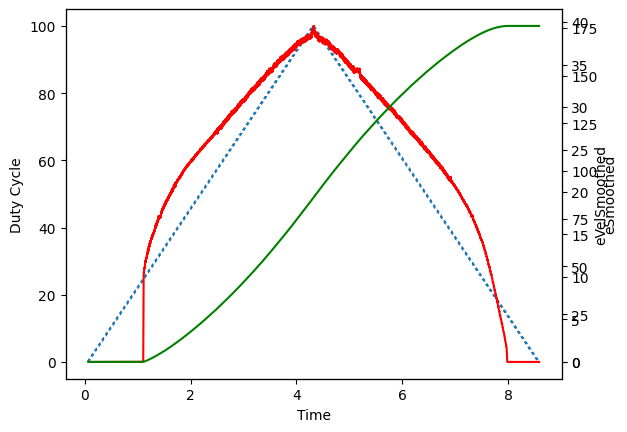

In [52]:
a = sns.lineplot( x=masterData["Time"][::10], y=masterData["Duty Cycle"][::10], dashes=(2, 2))
sns.lineplot( x=masterData["Time"][::10], y=masterData["eVelSmoothed"][::10], ax=a.axes.twinx(), color="r")
sns.lineplot( x=masterData["Time"][::10], y=masterData["eSmoothed"][::10], ax=a.axes.twinx(), color="g")

In [53]:
masterData["eVelSmoothed"].max()

39.550755033590846

/tmp/ipykernel_154499/2423932998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masterData["nonZeroV"][masterData["nonZeroV"] == 0] = None
/tmp/ipykernel_154499/2423932998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masterData["nonZeroVCropped"][:32450] = None


(24.705882352941178, 10.065016778523395, 14.117647058823529)

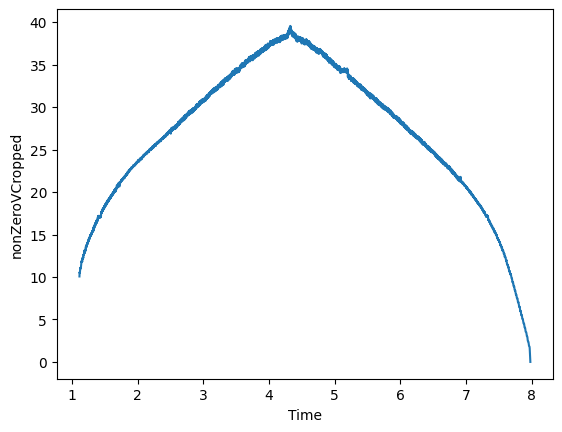

In [63]:
masterData["nonZeroV"] = masterData["eVelSmoothed"] * 1
masterData["nonZeroV"][masterData["nonZeroV"] == 0] = None

masterData["nonZeroVCropped"] = masterData["nonZeroV"]
masterData["nonZeroVCropped"][:32450] = None

sns.lineplot( x=masterData["Time"][::10], y=masterData["nonZeroVCropped"][::10])

iCold = masterData["nonZeroVCropped"].first_valid_index()
iWarm = masterData["nonZeroVCropped"].last_valid_index()

masterData["Duty Cycle"][iCold], masterData["nonZeroVCropped"][iCold], masterData["Duty Cycle"][iWarm], 

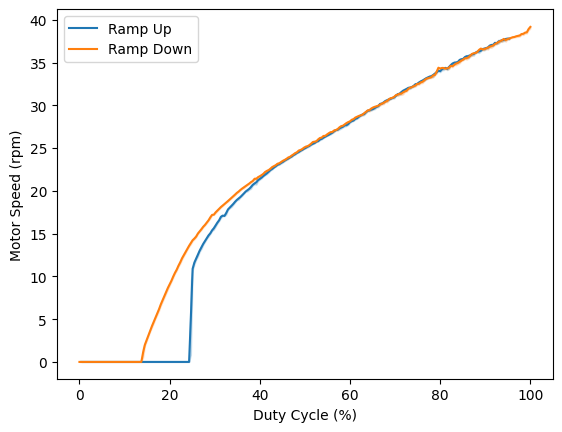

In [55]:
l = len(masterData)
a = sns.lineplot(x=masterData["Duty Cycle"][:l//2:100],  y=masterData["eVelSmoothed"][:l//2:100], label="Ramp Up")
a.set(xlabel="Input (%)")
a.set(ylabel="Motor Speed (rpm)")
b = sns.lineplot(x=masterData["Duty Cycle"][l//2::100],  y=masterData["eVelSmoothed"][l//2::100], label="Ramp Down")
b.legend()